# *Data Mining - Data Science*

## Medidas de similitud

Distancia euclidea

In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Función que calcula la Distancia Euclidea.

1. Convierte una lista a un vector (array) de Numpy.
1. Calcula los cuadrados de las diferencias entre las coordenadas respectivamente.
1. Calcula la suma de los resultados anteriores.
1. Calcula la raíz cuadrada del resultado anterior (distancia euclidea).

In [5]:
def euclidean(v1, v2):
    
    v1 = np.array(v1)
    v2 = np.array(v2)
    
    diff = np.power(np.array(v1)- np.array(v2), 2)
    
    sigma_val = np.sum(diff)
    
    euclid_score = np.sqrt(sigma_val)
    
    return euclid_score


Definimos los *ratings* sobre 5 películas de 3 usuarios distintos.

In [6]:
u1 = [5,1,2,4,5]
u2 = [1,5,4,2,1]
u3 = [5,2,2,4,4]

In [7]:
euclidean(u1, u2)

7.483314773547883

In [8]:
euclidean(u1, u3)

1.4142135623730951

### Correlación de Pearson

In [9]:
alice = [1,1,3,2,4]
bob = [2,2,4,3,5]

euclidean(alice, bob)

2.23606797749979

In [10]:
eve = [5,5,3,4,2]

euclidean(eve, alice)

6.324555320336759

In [11]:
euclidean(eve, bob)

5.385164807134504

In [12]:
display(np.corrcoef(alice, bob), np.corrcoef(alice, eve), np.corrcoef(bob, eve))

array([[1., 1.],
       [1., 1.]])

array([[ 1., -1.],
       [-1.,  1.]])

array([[ 1., -1.],
       [-1.,  1.]])

## *Clustering*

### *K-Means*

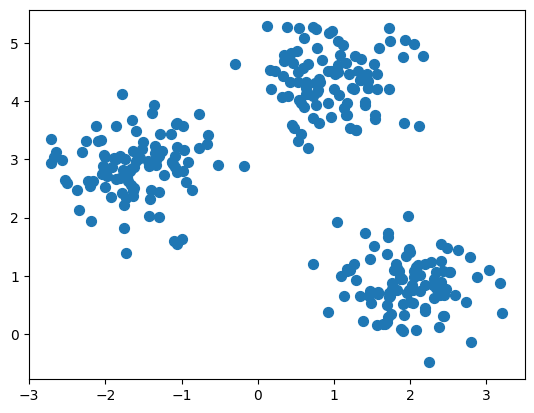

In [13]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.50, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

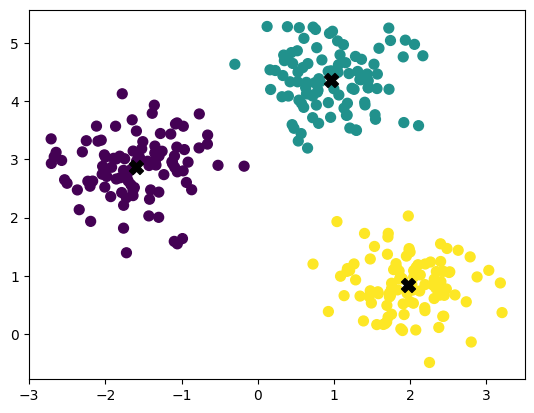

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='random', max_iter=10)

kmeans.fit(X)

y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50)

centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X')

<Axes: >

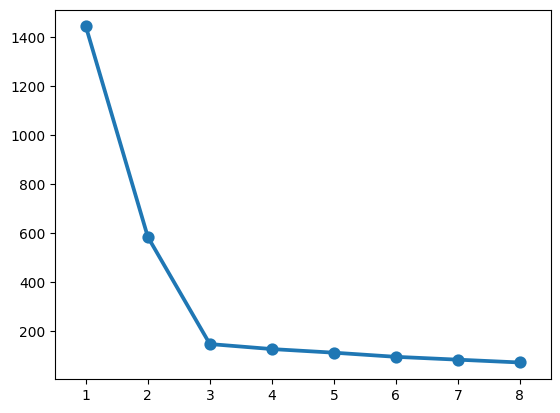

In [15]:
ss = []

for i in range(1,9):
    
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=10, init='random').fit(X)
    
    ss.append(kmeans.inertia_)

sns.pointplot(x=[j for j in range(1,9)], y=ss)

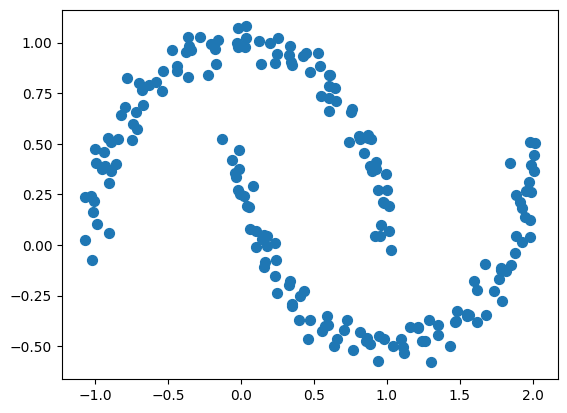

In [16]:
from sklearn.datasets import make_moons

X_m, y_m = make_moons(200, noise=.05, random_state=0)

plt.scatter(X_m[:, 0], X_m[:, 1], s=50);

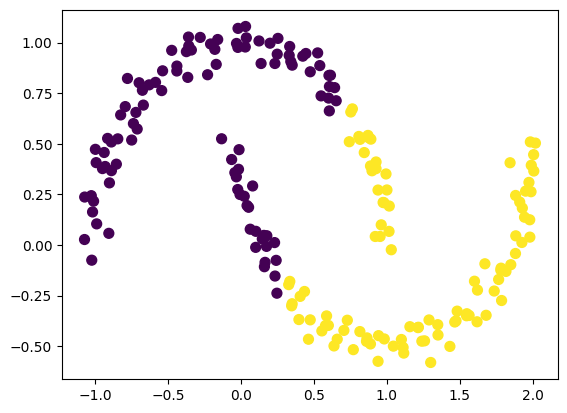

In [17]:
kmm = KMeans(n_clusters=2, init='random', max_iter=10)
kmm.fit(X_m)

y_m_pred = kmm.predict(X_m)

plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_pred, s=50)

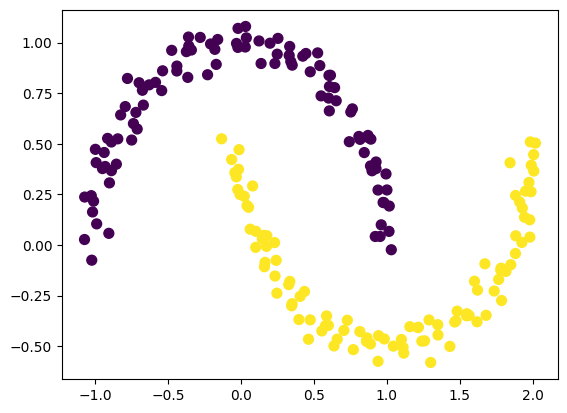

In [18]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')

y_m_sc = model.fit_predict(X_m)

plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_sc, s=50);


## Reducción de la dimensionalidad

### Análisis de Componentes Principales (*PCA*)

In [19]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=['sepal_length','sepal_width','petal_length','petal_width','class'])

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
from sklearn.preprocessing import StandardScaler

X = iris.drop('class', axis=1)
y = iris['class']

X = pd.DataFrame(StandardScaler().fit_transform(X), 
                 columns = ['sepal_length','sepal_width','petal_length','petal_width'])

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_iris = pca.fit_transform(X)
pca_iris = pd.DataFrame(data = pca_iris, columns = ['PC1', 'PC2'])

pca_iris.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [22]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [23]:
pca_iris = pd.concat([pca_iris, y], axis = 1)

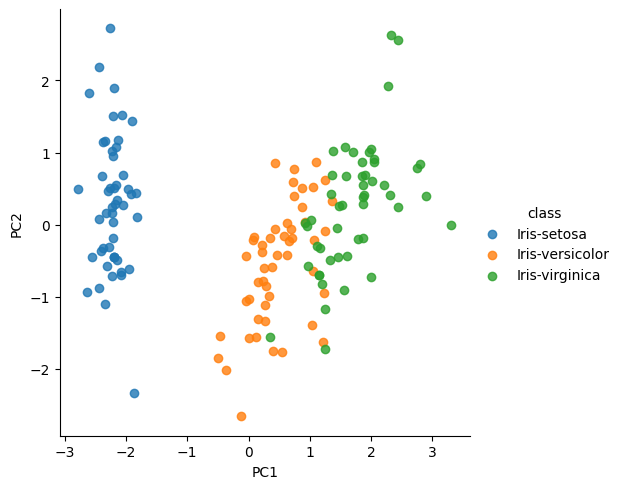

In [24]:
sns.lmplot(x='PC1', y='PC2', data=pca_iris, hue='class', fit_reg=False)

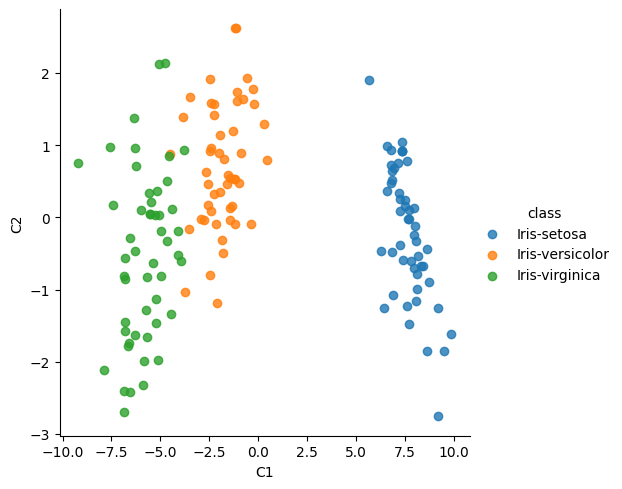

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2)

lda_iris = lda.fit_transform(X, y)
lda_iris = pd.DataFrame(data = lda_iris, columns = ['C1', 'C2'])

lda_iris = pd.concat([lda_iris, y], axis = 1)

sns.lmplot(x='C1', y='C2', data=lda_iris, hue='class', fit_reg=False)

## *Supervised Learning*

### *Gradient Boosting*

In [26]:
X, y = iris.drop('class', axis=1), iris['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

gbc.score(X_test, y_test)

0.9736842105263158

<Axes: >

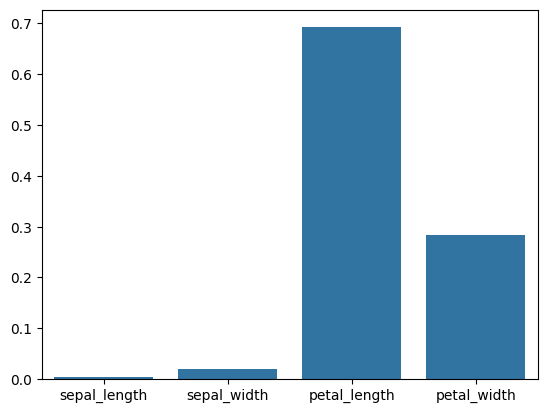

In [27]:
sns.barplot(x= ['sepal_length','sepal_width','petal_length','petal_width'], y=gbc.feature_importances_)